# Assignment 7: Using a Pipeline for Text Transformation and Classification

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In this assignment, you will practice text vectorization to transform text into numerical feature vectors that can be used to train a classifier. You will then see how to use scikit-learn pipelines to chain together these processes into one step. You will:

1. Load the Airbnb "listings" data set.
2. Use a single text column as a feature. 
3. Transform features using a TF-IDF vectorizer. 
4. Fit a logistic regression model to the transformed features. 
5. Evaluate the performance of the model using AUC.
6. Set up a scikit-learn pipeline to perform the same tasks above. 
7. Execute the pipeline and verify that the performance is the same.

**<font color='red'>Note: some of the code cells in this notebook may take a while to run</font>**

## Part 1: Load the Data Set

We will work with a new version of the familiar Airbnb "listings" data set. It contains all of the numerical and binary columns we used previously, but also contains unstructured text fields.

In [2]:
filename = os.path.join(os.getcwd(), "data", "airbnb_text_readytofit.csv.gz")
df = pd.read_csv(filename, header=0)

In [3]:
df.head()
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count',
       'calculated_host_listings_count_enti

## Part 2: Create Training and Test Data Sets

### Create Labeled Examples 

<b>Task</b>: Create labeled examples from DataFrame `df`. We will have one text feature and one label.  

In the code cell below carry out the following steps:

* Get the `host_is_superhost` column from DataFrame `df` and assign it to the variable `y`. This will be our label.
* Gets the column `description` from DataFrame `df` and assign it to the variable `X`. This will our feature. Note that the `description` feature contains text describing the listing.

In [4]:
y = df["host_is_superhost"]
X = df["description"]

In [5]:
X.head

<bound method NDFrame.head of 0        Beautiful, spacious skylit studio in the heart...
1        Enjoy 500 s.f. top floor in 1899 brownstone, w...
2        We welcome you to stay in our lovely 2 br dupl...
3        Please don’t expect the luxury here just a bas...
4        Our best guests are seeking a safe, clean, spa...
                               ...                        
27383    THIS LOVELY HOME IS THE SPACIOUS SUITE WITH PR...
27384    Just fully renovated from head to toe. On the ...
27385    Amazing and comfortable space in Brooklyn, sam...
27386    This stylish place to stay is perfect for a gr...
27387    Private bedroom on its own floor with very lar...
Name: description, Length: 27388, dtype: object>

In [6]:
X.shape

(27388,)

### Split Labeled Examples into Training and Test Sets

<b>Task</b>: In the code cell below create training and test sets out of the labeled examples. 

1. Use scikit-learn's `train_test_split()` function to create the data sets.

2. Specify:
    * A test set that is 20 percent (.20) of the size of the data set.
    * A seed value of '1234'. 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1234)

## Part 3: Implement TF-IDF Vectorizer to Transform Text

<b>Task</b>: Complete the code in the cell below to implement a TF-IDF transformation on the training and test data.
Use the "Transforming Text For a Classifier" demo as a guide. Follow the following steps:

1. Create a `TfidfVectorizer` object and save it to the variable `tfidf_vectorizer`.
2. Call `tfidf_vectorizer.fit()` to fit the vectorizer to the training data `X_train`.
3. Call the `tfidf_vectorizer.transform()` method to use the fitted vectorizer to transform the training data `X_train`. Save the result to `X_train_tfidf`.
4. Call the `tfidf_vectorizer.transform()` method to use the fitted vectorizer to transform the test data `X_test`. Save the result to `X_test_tfidf`.

In [8]:
# 1. Create a TfidfVectorizer object and save it to the variable 'tfidf_vectorizer'
tfidf_vectorizer = TfidfVectorizer()

# 2. Fit the vectorizer to X_train
tfidf_vectorizer.fit(X_train)

# 3. Using the fitted vectorizer, transform the training data and save the data to variable 'X_train_tfidf'
X_train_tfidf = tfidf_vectorizer.transform(X_train)

# 4. Using the fitted vectorizer, transform the test data and save the data to variable 'X_test_tfidf'
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [9]:
print(X_test_tfidf)

  (0, 24430)	0.039019290860570106
  (0, 24426)	0.09715143009923405
  (0, 24422)	0.02936761517207701
  (0, 24115)	0.024072973451435782
  (0, 23987)	0.16004793532869335
  (0, 23928)	0.14647555045363392
  (0, 23862)	0.06148702963925663
  (0, 23801)	0.1792640683066408
  (0, 23650)	0.12625140283237327
  (0, 23060)	0.050764892977417084
  (0, 22785)	0.046696299726627595
  (0, 22444)	0.04698943829696139
  (0, 22212)	0.1484152729657494
  (0, 22172)	0.06494533278813718
  (0, 22165)	0.06337395630790084
  (0, 22024)	0.046213938145034036
  (0, 21957)	0.07971703791195063
  (0, 21678)	0.0726727630250199
  (0, 21158)	0.04751163372674527
  (0, 20966)	0.05035805125243365
  (0, 20951)	0.05890715590539413
  (0, 20820)	0.05507788567949443
  (0, 20720)	0.17180100293454623
  (0, 20614)	0.023404113408785024
  (0, 20598)	0.08453076061248019
  :	:
  (5477, 7489)	0.11210528377288641
  (5477, 7030)	0.09854929978130436
  (5477, 6102)	0.06746154753496307
  (5477, 5065)	0.13465874127456495
  (5477, 5017)	0.041218530

## Part 4: Fit a Logistic Regression Model to the Transformed Training Data and Evaluate the Model
<b>Task</b>: Complete the code cell below to train a logistic regression model using the TF-IDF features, and compute the AUC on the test set.

Follow the following steps:

1. Create the `LogisticRegression` model object below and assign to variable `model`. Supply `LogisticRegression()` the following argument: `max_iter=200`.
2. Fit the logistic regression model to the transformed training data (`X_train_tfidf` and `y_train`).
3. Use the predict_proba() method to make predictions on the test data (`X_test_tfidf`). Save the second column to the variable `probability_predictions`. 
4. Use the `roc_auc_score()` function to compute the area under the ROC curve for the test data. Call the
function with the arguments `y_test` and `probability_predictions`. Save the result to the variable `auc`.
5. The 'vocabulary_' attribute of the vectorizer (`tfidf_vectorizer.vocabulary_`) returns the feature space. It returns a dictionary; find the length of the dictionary to get the size of the feature space. Save the result to `len_feature_space`.

In [10]:
# 1. Create the LogisticRegression model object 
model = LogisticRegression(max_iter = 200)


# 2. Fit the model to the transformed training data
model.fit(X_train_tfidf, y_train)


# 3. Use the predict_proba() method to make predictions on the test data 
probability_predictions = model.predict_proba(X_test_tfidf)[:,1]


# 4. Compute the area under the ROC curve for the test data. 
auc = roc_auc_score(y_test, probability_predictions)


print('AUC on the test data: {:.4f}'.format(auc))

# 5. Compute the size of the resulting feature space 
len_feature_space = tfidf_vectorizer.vocabulary_


print('The size of the feature space: {0}'.format(len_feature_space))


AUC on the test data: 0.7646
The size of the feature space: {'lovingly': 13733, 'crafted': 6802, 'basement': 3607, 'studio': 21227, 'apartment': 2759, 'with': 24115, 'lots': 13689, 'of': 15875, 'sunlight': 21417, 'separate': 19727, 'entrance': 8712, 'ideal': 11748, 'for': 9849, 'individuals': 11987, 'and': 2626, 'couples': 6714, '15': 334, 'min': 14622, 'subway': 21324, 'to': 22212, 'midtown': 14578, 'charming': 5460, 'convent': 6507, 'avenue': 3278, 'location': 13586, 'great': 10694, 'walk': 23650, 'run': 19180, 'double': 7986, 'bed': 3779, 'brand': 4463, 'new': 15384, 'kitchen': 12820, 'bathroom': 3657, 'grocery': 10779, 'store': 21097, 'choice': 5621, 'restaurants': 18712, 'coffee': 5928, 'shops': 19973, 'closeby': 5833, 'large': 13056, 'closet': 5841, 'hang': 11005, 'clothes': 5852, 'put': 17763, 'away': 3314, 'suitcases': 21375, 'br': 4448, 'gorgeous': 10577, 'fireplace': 9582, 'mantel': 14075, 'salvaged': 19301, 'from': 10085, 'the': 21957, 'waldorf': 23644, 'astoria': 3113, 'hot

## Part 5: Experiment with Different Document Frequency Values and Analyze the Results

<b>Task</b>: The cell below will loop over a range of 'document frequency' values. For each value, it will fit a vectorizer specifying `ngram_range=(1,2)`. It will then fit a logistic regression model to the transformed data and evaluate the results.   

Complete the loop in the cell below by adding the code you wrote above inside the loop. 

Note: This may take a short while to run.

In [13]:
for min_df in [1,10,100,1000]:
    
    print('\nDocument Frequency Value: {0}'.format(min_df))

    # 1. Create a TfidfVectorizer object and save it to the variable 'tfidf_vectorizer'
    # Use the arguments: 'ngram_range=(1,2)'' and 'min_df=min_df'   
    tfidf_vectorizer = TfidfVectorizer(ngram_range = (1,2), min_df = min_df) 
    
    # 2. Fit the vectorizer to X_train  
    tfidf_vectorizer.fit(X_train)
    

    # 3. Using the fitted vectorizer, transform the training data.
    # Save the transformed training data to variable 'X_train_tfidf'
    X_train_tfidf = tfidf_vectorizer.transform(X_train)
    

    # 4. Using the fitted vectorizer, transform the test data.
    # Save the transformed test data to variable 'X_test_tfidf'
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    

    # 5. Create the LogisticRegression model object and save it to variable 'model'.
    # Call LogisticRegression() with the argument 'max_iter=200'
    model = LogisticRegression(max_iter = 200)
       
    
    # 6. Fit the model to the transformed training data
    model.fit(X_train_tfidf, y_train)


    # 7. Use the predict_proba() method to make predictions on the transformed test data. 
    # Save the second column to the variable `probability_predictions`. 
    probability_predictions = model.predict_proba(X_test_tfidf)[:,1]


    # 8. Using roc_auc_score() function to compute the AUC. 
    auc = roc_auc_score(y_test, probability_predictions)

    
    print('AUC on the test data: {:.4f}'.format(auc))

    # 9. Compute the size of the resulting feature space 
    len_feature_space = tfidf_vectorizer.vocabulary_


    print('The size of the feature space: {0}'.format(len_feature_space))



Document Frequency Value: 1


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



AUC on the test data: 0.7903
The size of the feature space: {'lovingly': 18624, 'crafted': 9487, 'basement': 4541, 'studio': 28089, 'apartment': 3093, 'with': 33383, 'lots': 18533, 'of': 21147, 'sunlight': 28368, 'separate': 25930, 'entrance': 11049, 'ideal': 15347, 'for': 12382, 'individuals': 15950, 'and': 1802, 'couples': 9378, '15': 148, 'min': 19513, 'subway': 28216, 'to': 30314, 'midtown': 19462, 'charming': 7992, 'convent': 9129, 'avenue': 4205, 'location': 18346, 'great': 13719, 'walk': 32450, 'run': 25605, 'double': 10354, 'bed': 5086, 'brand': 6772, 'new': 20468, 'kitchen': 17208, 'bathroom': 4629, 'grocery': 13881, 'store': 27860, 'choice': 8116, 'restaurants': 25008, 'coffee': 8551, 'shops': 26249, 'closeby': 8437, 'large': 17481, 'closet': 8452, 'hang': 14152, 'clothes': 8500, 'put': 24138, 'away': 4244, 'suitcases': 28313, 'br': 6043, 'gorgeous': 13650, 'fireplace': 12029, 'mantel': 19031, 'from': 12918, 'the': 28989, 'astoria': 3997, 'hotel': 15087, 'history': 14884, 'hi

AUC on the test data: 0.7651
The size of the feature space: {'basement': 618, 'studio': 3812, 'apartment': 423, 'with': 4633, 'lots': 2566, 'of': 2896, 'sunlight': 3858, 'separate': 3514, 'entrance': 1522, 'ideal': 2103, 'for': 1699, 'and': 221, 'couples': 1297, '15': 16, 'min': 2694, 'subway': 3830, 'to': 4157, 'midtown': 2686, 'charming': 1101, 'avenue': 571, 'location': 2530, 'great': 1888, 'walk': 4482, 'run': 3470, 'double': 1425, 'bed': 680, 'brand': 939, 'new': 2826, 'kitchen': 2368, 'bathroom': 629, 'grocery': 1906, 'store': 3784, 'choice': 1119, 'restaurants': 3373, 'coffee': 1174, 'shops': 3557, 'large': 2401, 'closet': 1160, 'hang': 1952, 'clothes': 1168, 'put': 3266, 'away': 576, 'br': 811, 'gorgeous': 1881, 'fireplace': 1651, 'from': 1783, 'the': 3933, 'astoria': 541, 'hotel': 2068, 'history': 2042, 'historic': 2039, 'landmark': 2398, 'house': 2074, 'studio apartment': 3813, 'apartment with': 451, 'with lots': 4671, 'lots of': 2567, 'of sunlight': 2941, 'separate entrance'

AUC on the test data: 0.7021
The size of the feature space: {'basement': 54, 'studio': 409, 'apartment': 27, 'with': 504, 'lots': 261, 'of': 309, 'separate': 375, 'entrance': 154, 'for': 175, 'and': 21, 'couples': 132, '15': 1, 'min': 276, 'subway': 411, 'to': 449, 'midtown': 275, 'charming': 113, 'location': 257, 'great': 195, 'walk': 474, 'bed': 63, 'brand': 95, 'new': 297, 'kitchen': 237, 'bathroom': 56, 'grocery': 196, 'restaurants': 358, 'coffee': 122, 'shops': 379, 'large': 242, 'closet': 121, 'away': 48, 'br': 83, 'from': 181, 'the': 418, 'hotel': 211, 'historic': 209, 'house': 212, 'apartment with': 32, 'lots of': 262, 'brand new': 96, 'kitchen and': 238, 'and bathroom': 22, 'from the': 182, 'of the': 311, 'beautiful': 62, 'bedroom': 66, 'in': 216, 'heart': 204, 'york': 512, 'city': 116, 'amazing': 18, 'neighborhood': 295, 'nice': 302, 'full': 184, 'bath': 55, 'living': 250, 'room': 364, 'area': 36, 'modern': 284, 'bright': 97, 'spacious': 397, 'one': 316, 'best': 74, 'areas': 

## Part 6: Set up a TF-IDF + Logistic Regression Pipeline

We will look at a new way to chain together various methods to automate the machine learning workflow. We will use  the scikit-learn `Pipeline` utility. For more information, consult the online [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). First, let's import `Pipeline`.

In [14]:
from sklearn.pipeline import Pipeline

The code cell below uses a scikit-learn pipeline to perform TF-IDF vectorization and the fitting of a logistic regression model to the transformed data.

This is implemented in the following steps:

1. First we will create a list containing the steps to perform in the pipeline. Items in the list will be executed in the order in which they appear.

    Each item in the list is a tuple consisting of two items: 
    1. A descriptive name of what is being performed. You can create any name you'd like.
    2. The code to run.
    
    
2. Next we will create a Pipeline object and supply it the list of steps using the `step` parameter


3. Finally, we will use this pipeline as we would any model object and fit this pipeline to the original training data and use it to make predictions on the original test data. Note that when calling the `fit()` and `predict()` methods on the pipeline object, all of the steps in the pipeline are performed on the data.

Review the code in the cell below to see how it works.

In [15]:
print('Begin ML pipeline...')

# 1. Define the list of steps:
s = [
        ("vectorizer", TfidfVectorizer(ngram_range=(1,2), min_df=10)),
        ("model", LogisticRegression(max_iter=200))
    ]

# 2. Define the pipeline:
model_pipeline = Pipeline(steps=s)

# We can use the pipeline the way would would use a model object 
# when fitting the model on the training data testing on the test data:

# 3. Fit the pipeline to the training data
model_pipeline.fit(X_train, y_train)

# 4. Make predictions on the test data
probability_predictions = model_pipeline.predict_proba(X_test)[:,1]

print('End pipeline')

Begin ML pipeline...
End pipeline


Let's compare the performance of our model when using this approach:

In [16]:
# Evaluate the performance by computing the AUC

auc = roc_auc_score(y_test, probability_predictions)
print('AUC on the test data: {:.4f}'.format(auc))

AUC on the test data: 0.7903


In some case, scikit-learn gives you the ability to provide a pipeline object as an argument to a function. One such function is `plot_roc_curve()`. You'll see in the online [documentation](https://scikit-learn.org/0.23/modules/generated/sklearn.metrics.plot_roc_curve.html) that this function can take a pipeline (estimator) as an argument. Rather than implementing steps 3 and 4 in the code cell above, you can call `plot_roc_curve()` with the pipeline and the test data. 

Let's import the function and try it out:

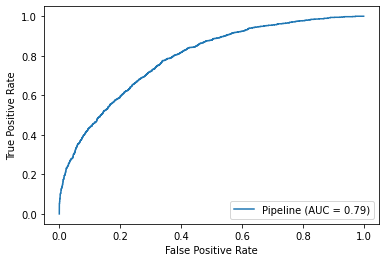

In [17]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model_pipeline, X_test, y_test) 

Note that in newer versions of scikit-learn, this function has been replaced by [RocCurveDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html).